# Student grades prediction

### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate.                                    
CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

#### Dataset Link-                                                                                                      
•  https://github.com/dsrscientist/dataset4                                                           
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [1]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("Grades.csv")

In [76]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Our dataset has 571 rows and 43 columns. Column CGPA is the target variable and other columns are features. features contain grades of students. CGPA is the fianl marks.

### Exploratory Data Analysis (EDA)

In [3]:
# checkig dimension of the dataset
df.shape
print('Total number of rows-',df.shape[0],'\nTotal number of columns-',df.shape[1])

Total number of rows- 571 
Total number of columns- 43


In [4]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
# checking the types of the columns
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
# column Seat No. is not useful in prediction, so dropping it 
df.drop('Seat No.',axis= 1,inplace=True)
df.shape

(571, 42)

In [7]:
# lets check the duplicate rows in dataset
df.duplicated().sum()

0

No duplicate data present

In [8]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('number of unique value in',i,'column -',df[i].nunique())
        print(dataframe[i].value_counts())
        print('\n')    

In [9]:
value_count(df)

number of unique value in PH-121 column - 13
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


number of unique value in HS-101 column - 12
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


number of unique value in CY-105 column - 13
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


number of unique value in HS-105/12 column - 13
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


number of unique value in MT-111 column - 13
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


number of

In grades W indicates Withdrew, WU indicates Withdrew Unofficially and I indicates Incomplete.
W,WU and I grades are not included in the calculation of GPA.

In [10]:
# finding rows which contain W,WU and I
indices = []
for i in range(df.shape[0]):
    for j in df.iloc[i]:
        if j =='WU'or j=='W' or j=='I':
            indices.append(i)
indices=set(indices)
print(len(indices))

24


In [11]:
# removing rows which contain WU,W and I
df.drop(index=indices,inplace=True)
df.shape

(547, 42)

In [12]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
PH-121        0
HS-101        0
CY-105        0
HS-105/12     0
MT-111        1
CS-105        0
CS-106        0
EL-102        1
EE-119        2
ME-107        1
CS-107        1
HS-205/20     1
MT-222        1
EE-222        1
MT-224        1
CS-210        1
CS-211        1
CS-203        1
CS-214        1
EE-217        1
CS-212        1
CS-215        1
MT-331        1
EF-303        2
HS-304        2
CS-301        2
CS-302        2
TC-383        2
MT-442        2
EL-332        1
CS-318        1
CS-306        1
CS-312        1
CS-317        2
CS-403        2
CS-421        3
CS-406       75
CS-414        3
CS-419        3
CS-423        4
CS-412       66
CGPA          0
dtype: int64

Total null values in dataset -  192


In [13]:
# filling null values using mode method
for i in df.columns:
     df[i]=df[i].fillna(df[i].mode()[0])
df.isnull().sum().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     547 non-null    object 
 1   HS-101     547 non-null    object 
 2   CY-105     547 non-null    object 
 3   HS-105/12  547 non-null    object 
 4   MT-111     547 non-null    object 
 5   CS-105     547 non-null    object 
 6   CS-106     547 non-null    object 
 7   EL-102     547 non-null    object 
 8   EE-119     547 non-null    object 
 9   ME-107     547 non-null    object 
 10  CS-107     547 non-null    object 
 11  HS-205/20  547 non-null    object 
 12  MT-222     547 non-null    object 
 13  EE-222     547 non-null    object 
 14  MT-224     547 non-null    object 
 15  CS-210     547 non-null    object 
 16  CS-211     547 non-null    object 
 17  CS-203     547 non-null    object 
 18  CS-214     547 non-null    object 
 19  EE-217     547 non-null    object 
 20  CS-212    

Our dataset has 547 rows and 42 columns. CGPA is the target variable and others are features. features contain object data type and target variable contain float64 data type.

In [15]:
df.describe(include=[object])

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,547,547,547,547,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547
unique,12,12,11,11,12,11,11,11,11,11,...,12,12,12,11,12,12,12,12,12,12
top,A-,A-,A,A,A-,A,A-,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,112,80,174,95,105,148,113,103,134,79,...,120,94,81,134,89,252,179,123,126,223


In [16]:
df.describe()

,CGPA
count,547.000000
mean,2.995388
std,0.587388
min,0.800000
25%,2.587500
50%,3.058000
75%,3.474000
max,3.985000


In [17]:
# separating columns
first_year = ['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107']
second_year = ['HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215']
third_year = ['MT-331','EF-303','HS-304','CS-301','CS-302', 'TC-383','EL-332','CS-318','CS-306','CS-312','CS-317']
fourth_year = ['MT-442','CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412',]
final = ['CGPA']

In [18]:
def plot(name):
    plt.figure(figsize = (20,16), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 20:
            ax = plt.subplot(4 , 4 , plotnumber)
            plot_name(df[i],color='orange')
            plt.xlabel(i, fontsize = 12)
            plotnumber +=1
    plt.show()

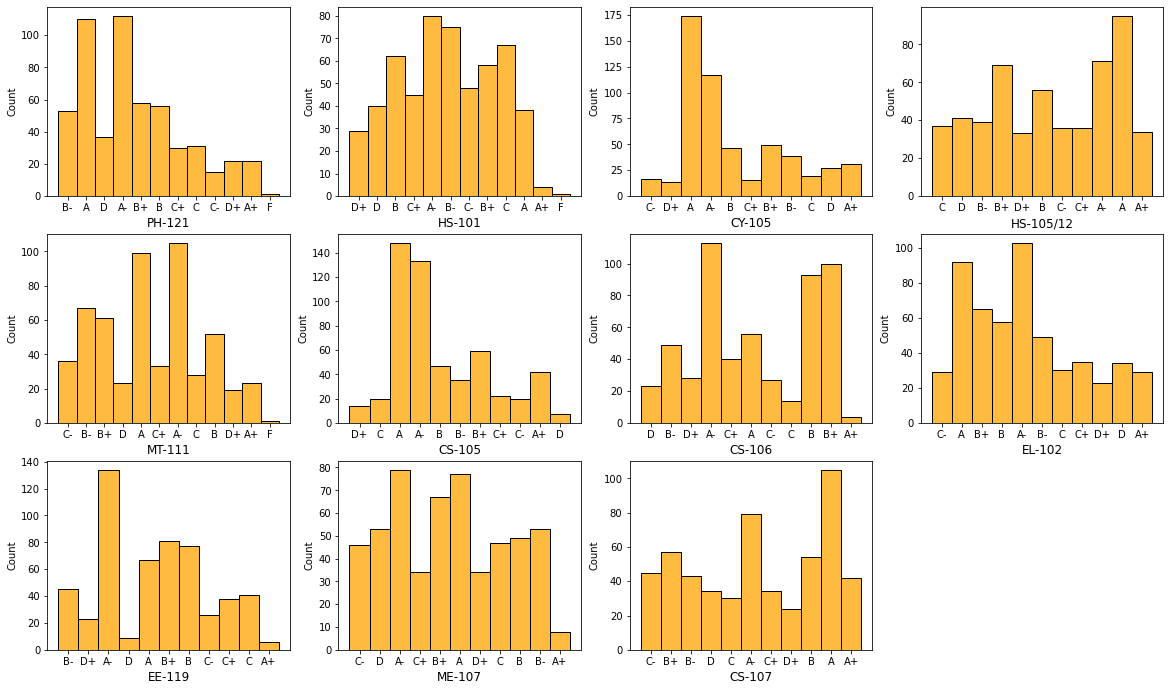

In [19]:
# first year histogram plot
plot_name = sns.histplot
plot(first_year)

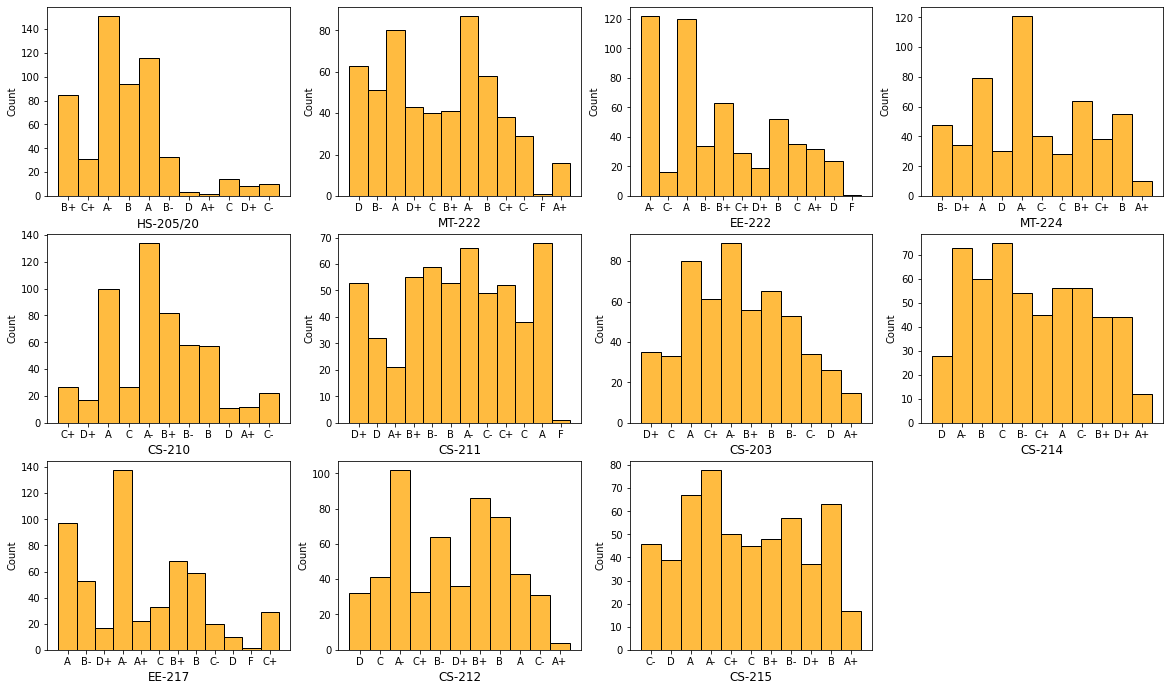

In [20]:
# second year histogram plot
plot_name = sns.histplot
plot(second_year)

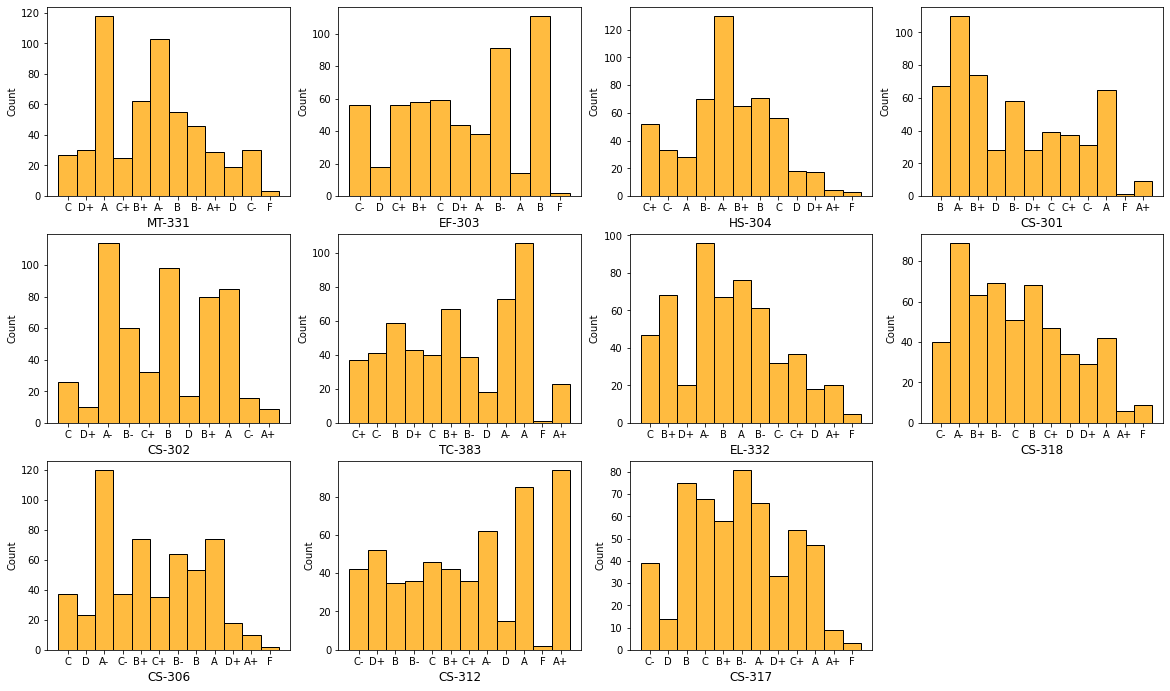

In [21]:
# third year histogram plot
plot_name = sns.histplot
plot(third_year)

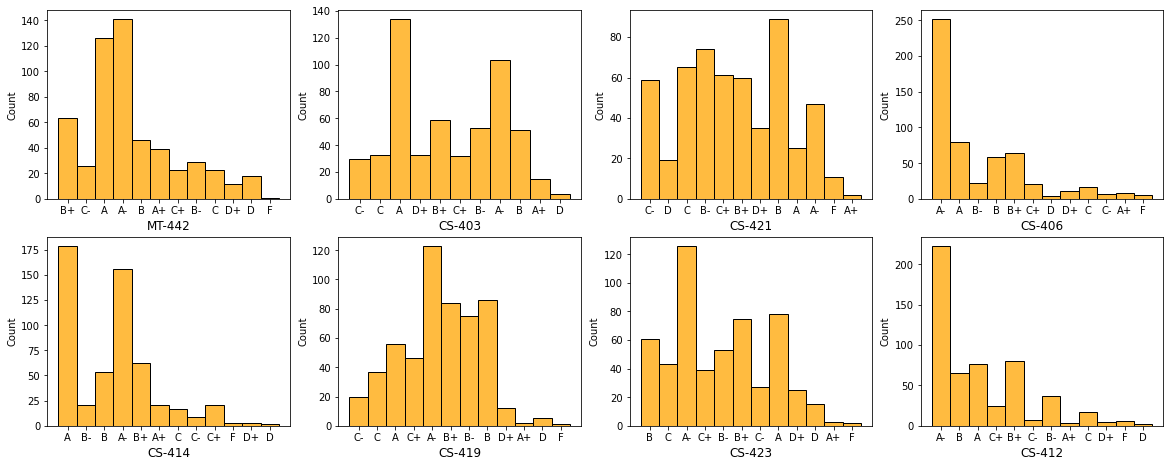

In [22]:
# fourth year histogram plot
plot_name = sns.histplot
plot(fourth_year)

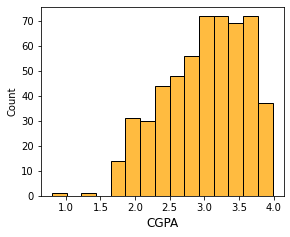

In [23]:
# final histogram plot
plot_name = sns.histplot
plot(final)

In [24]:
# converting grades using 4.0 scale

for i in df.columns[0:43]:
    df[i].replace('A+', 4.0, inplace=True)
    df[i].replace('A', 4.0, inplace=True)
    df[i].replace('A-', 3.7, inplace=True)
    df[i].replace('B+', 3.3, inplace=True)
    df[i].replace('B', 3.0, inplace=True)
    df[i].replace('B-', 2.7, inplace=True)
    df[i].replace('C+', 2.3, inplace=True)
    df[i].replace('C', 2.0, inplace=True)
    df[i].replace('C-', 1.7, inplace=True)
    df[i].replace('D+', 1.3, inplace=True)
    df[i].replace('D', 1.0, inplace=True)
    df[i].replace('F', 0.0, inplace=True)
    

In [25]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [26]:
# separating columns
x = df.drop(columns = ['CGPA'])                 # features
y = df['CGPA']                                  # target variable

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [28]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.368219,-1.482468,-1.812028,-0.895585,-1.469864,-2.638858,-2.362429,-1.384520,-0.415524,-1.027754,...,-1.080273,-1.218351,-1.196252,-1.632155,-0.954219,0.481428,0.781596,-1.834289,0.017060,0.546175
1,1.009164,-1.815901,-2.266228,-1.900270,-0.361794,-1.737503,-2.362429,1.069848,-2.152467,-1.728979,...,-2.204103,-1.607455,-2.018890,-1.286782,-1.762740,0.481428,-1.154965,-1.421555,-1.135004,-0.467545
2,1.009164,0.406988,0.799626,-0.192305,0.303048,0.837796,-0.323993,0.322866,0.825150,0.975744,...,0.830237,0.046237,0.331504,1.015704,-0.607710,0.900760,0.781596,1.330004,0.823504,0.980626
3,-2.169412,-0.371023,-2.266228,-1.900270,-2.245512,0.451501,-2.002705,-1.384520,-2.524669,-0.426705,...,-1.417422,-1.607455,-0.843693,-2.092652,-0.954219,-0.916348,-0.708066,-1.008821,-0.789385,-1.481264
4,0.691307,1.184999,0.458975,0.410507,1.078697,0.837796,0.875087,0.322866,1.197352,0.975744,...,0.830237,-0.245591,0.684064,0.209833,0.200810,0.481428,0.781596,0.917270,0.823504,0.980626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.050361,1.518432,0.799626,0.812381,1.078697,0.837796,0.875087,0.749713,1.197352,0.575044,...,0.380705,0.727169,1.154142,1.015704,1.702349,0.900760,-0.261168,0.366958,0.017060,0.980626
543,1.009164,1.518432,0.799626,1.113787,1.078697,0.837796,1.234811,0.749713,1.197352,1.276269,...,0.830237,0.338065,0.684064,1.015704,1.702349,0.481428,-0.708066,0.917270,-1.135004,0.546175
544,-0.050361,1.518432,0.458975,0.410507,1.078697,0.837796,1.234811,1.069848,1.197352,0.274520,...,0.380705,0.727169,0.331504,1.015704,0.893828,0.900760,-2.197729,0.366958,0.823504,0.546175
545,1.009164,0.740421,-2.606879,1.113787,-2.245512,-2.638858,-0.323993,-1.384520,-0.415524,-1.027754,...,0.380705,-1.899282,0.331504,-0.135539,-0.954219,-3.292567,-2.197729,-0.045775,-0.328559,-1.915715


In [29]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [30]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
LS = Lasso()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,LS,DTR,GBR,KNN,ETR,svr]

In [31]:
# finding best random state
def random_state(model):
    max_acc = 0
    max_rs = 0
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = r2_score(y_test,y_pred)
        if acc>max_acc:
            max_acc=acc
            max_rs = i
    print('maximum accuracy=',max_acc,'\nbest random state=',max_rs)

In [32]:
random_state(LinearRegression())

maximum accuracy= 0.9874867691570867 
best random state= 46


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=46)

In [34]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    train_pred = name.predict(x_train)
    score_r2 = r2_score(y_test,y_pred)
    train_score = r2_score(y_train,train_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x,y)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [35]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.9874867691570867 
r2 score on training data = 0.9590910772795184 
Mean absolute error = 0.05422150229407796 
Mean squared error = 0.004823300576077574 
Root mean squared error = 0.06944998614886524

Cross validation:-

cross validation scores:- [0.97313853 0.98522907 0.96913432 0.98622281 0.83036093] 
cross validation mean score:- 0.948817133152921 
Difference between r2 score and cross validation mean score = 3.866963600416562

__________________ Using RandomForestRegressor() _________________

r2 score = 0.9475290683098084 
r2 score on training data = 0.9847904013301922 
Mean absolute error = 0.0982110909090909 
Mean squared error = 0.020225238247878762 
Root mean squared error = 0.14221546416574662

Cross validation:-

cross validation scores:- [0.94710824 0.95165098 0.95753471 0.95071773 0.79013407] 
cross validation mean score:- 0.9194291451199106 
Difference between r2 score and cross validation mean sco

Our best model is SVR. It has least difference between r2 score and cross validation mean score.

#### Hyperparameter tuning

In [36]:
# parameters for SVR models
param = {'kernel':['rbf','sigmoid'],
         'gamma':['auto','scale'],
         'degree':[3,9,15]
          }

GSCV= GridSearchCV(estimator=svr,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [3, 9, 15], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']})

In [37]:
# finding best parameter value
GSCV.best_params_

{'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [38]:
# using best parameter value
Model = SVR(degree=3,gamma='auto',kernel='rbf')

In [39]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
score_r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2 score =',score_r2,'\nMean absolute error =',MAE,'\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)

r2 score = 0.9490495748931664 
Mean absolute error = 0.08768613697516235 
Mean squared error = 0.01963914978107857 
Root mean squared error = 0.14013975089559197


In [40]:
# saving model
import pickle
pickle.dump(Model,open('Student_grades.pkl','wb'))